In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as skc
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.svm import LinearSVC
from sklearn import tree 
from sklearn.model_selection import GridSearchCV

In [2]:
path = r'E:\\学业\\IPS\\组会\\task_2\\03_trainingData_B1.csv'
with open(path,encoding='utf-8')as f:
    data = np.loadtxt(path, dtype=str, delimiter=',')
train_df = pd.read_csv(path, header=0)
train_df = train_df[:]
train_df = train_df.replace('*',-110)

In [3]:
train_df['label']=0

C:\Users\Codex\AppData\Local\Temp\ipykernel_7372\2720751214.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_df['label']=0


In [4]:
train_df

,ID,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,...,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,checkSum,label
0,1,-110,-110,-88,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911162,1:-7685.72349999845:4864929.89029999,0
1,2,-110,-110,-87,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911145,1:-7685.72349999845:4864929.89029999,0
2,3,-110,-110,-88,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911148,1:-7685.72349999845:4864929.89029999,0
3,4,-110,-110,-87,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911151,1:-7685.72349999845:4864929.89029999,0
4,5,-110,-110,-87,-110,-110,-110,-110,-110,-110,...,35.094452,1,1,218,2,11,13,1369911155,1:-7685.72349999845:4864929.89029999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5243,5244,-110,-110,-110,-88,-110,-110,-110,-86,-86,...,91.295152,4,1,109,2,1,14,1371054764,4:-7587.10229999944:4864986.09099999,0
5244,5245,-110,-110,-110,-88,-110,-110,-110,-86,-86,...,91.295152,4,1,109,2,1,14,1371054765,4:-7587.10229999944:4864986.09099999,0
5245,5246,-110,-110,-110,-90,-110,-110,-110,-86,-86,...,91.295152,4,1,109,2,1,14,1371054765,4:-7587.10229999944:4864986.09099999,0
5246,5247,-110,-110,-110,-90,-110,-110,-110,-86,-86,...,91.295152,4,1,109,2,1,14,1371054765,4:-7587.10229999944:4864986.09099999,0


In [5]:
#手动打标签，如果是坐标轴右上方的为标签1，左下方的为标签0

train_df.label[(train_df['LONGITUDE']<60) & (train_df['LATITUDE']<60)] =1
train_df.label[(train_df['LONGITUDE']>60) & (train_df['LATITUDE']>60)] =0

C:\Users\Codex\AppData\Local\Temp\ipykernel_7372\3633591595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.label[(train_df['LONGITUDE']<60) & (train_df['LATITUDE']<60)] =1
C:\Users\Codex\AppData\Local\Temp\ipykernel_7372\3633591595.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.label[(train_df['LONGITUDE']>60) & (train_df['LATITUDE']>60)] =0


In [6]:
train_df_features = np.asarray(train_df.iloc[:,1:201])

In [7]:
train_df_label = np.asarray(train_df.iloc[:,211:212])

In [8]:
X_train,X_test,y_train,y_test = train_test_split(train_df_features,train_df_label,test_size=0.3)

In [16]:
model = LinearSVC(C=10)
model.fit(X_train,y_train)
pred = model.predict(X_test)


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [18]:
SVM_score =model.score(X_test,y_test)

In [19]:
SVM_score

0.9980952380952381

In [20]:
cs = np.logspace(-2,1)
for c in cs:
    print(c)

0.01
0.011513953993264475
0.013257113655901088
0.015264179671752334
0.017575106248547922
0.020235896477251575
0.023299518105153717
0.02682695795279726
0.030888435964774818
0.03556480306223128
0.040949150623804255
0.04714866363457394
0.054286754393238594
0.06250551925273973
0.07196856730011521
0.08286427728546843
0.09540954763499938
0.10985411419875583
0.12648552168552957
0.14563484775012436
0.16768329368110083
0.19306977288832497
0.22229964825261944
0.2559547922699536
0.29470517025518095
0.3393221771895328
0.3906939937054617
0.44984326689694465
0.517947467923121
0.5963623316594643
0.6866488450043002
0.7906043210907697
0.9102981779915218
1.0481131341546852
1.2067926406393288
1.3894954943731375
1.5998587196060574
1.8420699693267164
2.1209508879201904
2.44205309454865
2.8117686979742307
3.2374575428176433
3.727593720314938
4.291934260128778
4.941713361323833
5.689866029018293
6.551285568595509
7.543120063354615
8.68511373751352
10.0


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\l

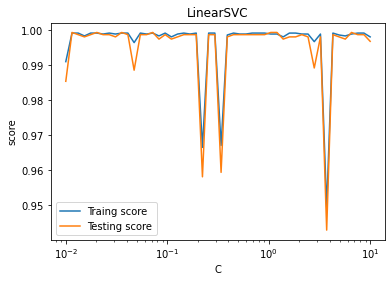

In [21]:
def test_LinearSVC_C(*data):
    '''
    测试 LinearSVC 的预测性能随参数 C 的影响
    '''
    X_train,X_test,y_train,y_test=data
    Cs=np.logspace(-2,1)
    train_scores=[]
    test_scores=[]
    for C in Cs:
        cls=svm.LinearSVC(C=C)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))

    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(Cs,train_scores,label="Traing score")
    ax.plot(Cs,test_scores,label="Testing score")
    ax.set_xlabel(r"C")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("LinearSVC")
    ax.legend(loc='best')
    plt.show()
    
# 调用 test_LinearSVC_C
test_LinearSVC_C(X_train,X_test,y_train,y_test)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y

D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Anaconda3\l

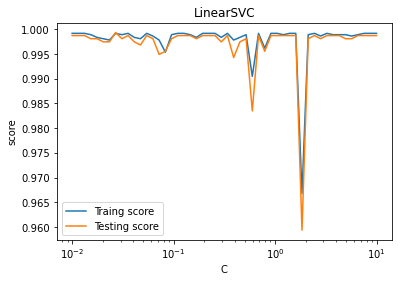

In [22]:
test_LinearSVC_C(X_train,X_test,y_train,y_test)